In [11]:
import pandas as pd

import numpy as np

from unidecode import unidecode

import seaborn as sns
import matplotlib.pyplot as plt

import joblib

import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix

import sklearn.metrics as metrics

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow_addons.optimizers import AdamW
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import json

import warnings

warnings.filterwarnings('ignore')

In [12]:
train = pd.read_excel('../Data/train.xlsx')
train.dropna(inplace=True)
train['data_type'] = 'train'

validation = pd.read_excel('../Data/validation.xlsx')
validation.dropna(inplace=True)
validation['data_type'] = 'validation'

test = pd.read_excel('../Data/test.xlsx')
test.dropna(inplace=True)
test['data_type'] = 'test'

df = pd.concat([train, test, validation])

In [13]:
train['d_gender'] = (train['gender']=='male').astype('int64')
test['d_gender'] = (test['gender']=='male').astype('int64')
validation['d_gender'] = (validation['gender']=='male').astype('int64')

In [14]:
X_train =list(train['name'])
Y_train = list(train['d_gender'])

X_validation = list(validation['name'])
Y_validation = list(validation['d_gender'])

X_test =list(test['name'])
Y_test = list(test['d_gender'])

In [15]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['name'])

In [16]:
joblib.dump(tokenizer, '../Modelos/vectorizer_2.joblib')

['../Modelos/vectorizer_2.joblib']

In [26]:
sequences = tokenizer.texts_to_sequences(train['name'])
sequences_val = tokenizer.texts_to_sequences(validation['name'])

In [22]:
max([len(x) for x in train['name']])

27

In [27]:
X_train = pad_sequences(sequences, maxlen=27)
X_validation = pad_sequences(sequences_val, maxlen=27)

In [29]:
X_train.shape

(39472, 27)

In [30]:
X_validation.shape

(9868, 27)

In [5]:
cv = joblib.load('../Modelos/vectorizer.joblib')

X_train=cv.transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()
X_validation = cv.transform(X_validation).toarray()

In [6]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_validation = np.array(Y_validation)

<h2> LSTM </h2>

In [38]:
# Create the model
model = Sequential()

# Add an Embedding layer to convert characters to dense vectors
model.add(Embedding(input_dim=128, output_dim=32, input_length=27))

# Add an LSTM layer to capture the sequence patterns
model.add(LSTM(100))

# Add a Dense layer with sigmoid activation for binary classification (male or female)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 27, 32)            4096      
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 57397 (224.21 KB)
Trainable params: 57397 (224.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
Y_validation = np.array(Y_validation)
Y_train = np.array(Y_train)

In [40]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_validation, Y_validation))

Epoch 1/50
1234/1234 [==============================] - 22s 17ms/step - loss: 0.3238 - accuracy: 0.8516 - val_loss: 0.2462 - val_accuracy: 0.8874
Epoch 2/50
1234/1234 [==============================] - 20s 16ms/step - loss: 0.2391 - accuracy: 0.8922 - val_loss: 0.2167 - val_accuracy: 0.8994
Epoch 3/50
1234/1234 [==============================] - 20s 16ms/step - loss: 0.2139 - accuracy: 0.9028 - val_loss: 0.2093 - val_accuracy: 0.9062
Epoch 4/50
1234/1234 [==============================] - 20s 16ms/step - loss: 0.1976 - accuracy: 0.9102 - val_loss: 0.1833 - val_accuracy: 0.9156
Epoch 5/50
1234/1234 [==============================] - 21s 17ms/step - loss: 0.1823 - accuracy: 0.9174 - val_loss: 0.1736 - val_accuracy: 0.9220
Epoch 6/50
1234/1234 [==============================] - 21s 17ms/step - loss: 0.1712 - accuracy: 0.9231 - val_loss: 0.1617 - val_accuracy: 0.9263
Epoch 7/50
1234/1234 [==============================] - 20s 16ms/step - loss: 0.1619 - accuracy: 0.9266 - val_loss: 0.1548 -

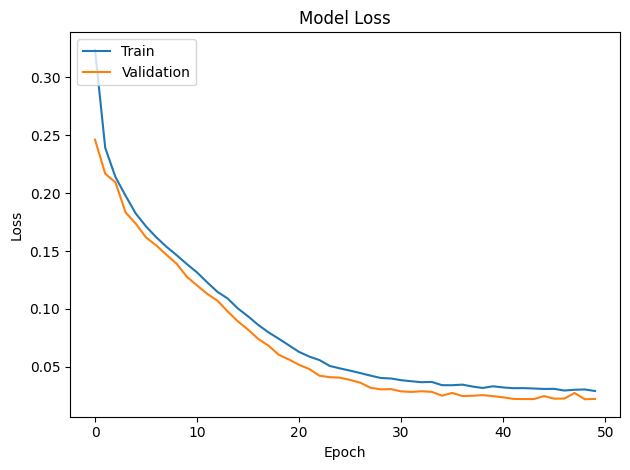

In [41]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [43]:
sequences_test = tokenizer.texts_to_sequences(test['name'])

In [44]:
X_test = pad_sequences(sequences_test, maxlen=27)

In [46]:
Y_test = np.array(Y_test)

In [47]:
y_pred = model.predict(X_test)
lstm_pred = [int(x) for x in (y_pred > 0.5)]

1788/1788 [==============================] - 7s 4ms/step


In [48]:
print(metrics.accuracy_score(lstm_pred, Y_test))

print(metrics.classification_report(Y_test, lstm_pred))

0.9696005593916616
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     36668
           1       0.94      0.97      0.96     20537

    accuracy                           0.97     57205
   macro avg       0.96      0.97      0.97     57205
weighted avg       0.97      0.97      0.97     57205



In [65]:
36668 / (36668 + 20537)

0.6409929201992833

[[35460  1208]
 [  531 20006]]


Text(0.5, 1.0, 'Confusion Matrix')

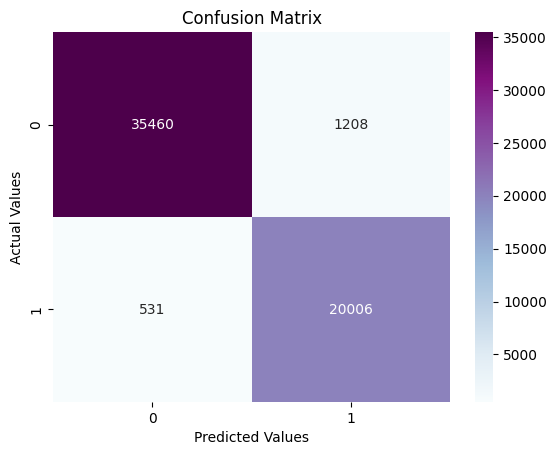

In [49]:
cmatrix = confusion_matrix(Y_test, lstm_pred)

print(cmatrix)

sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

plt.xlabel('Predicted Values')

plt.ylabel('Actual Values')

plt.title('Confusion Matrix')

In [50]:
model.save('../Modelos/V2/LSTM_V2')

INFO:tensorflow:Assets written to: ../Modelos/V2/LSTM_V2/assets


INFO:tensorflow:Assets written to: ../Modelos/V2/LSTM_V2/assets


<h2> Deep LSTM </h2>

In [51]:
step = tf.Variable(0, trainable=False)
schedule = tf.optimizers.schedules.PiecewiseConstantDecay([10000, 15000], [1e-0, 1e-1, 1e-2])
    
lr = 1e-3 * schedule(step)
wd = lambda: 1e-4 * schedule(step)

adamw = AdamW(lr=lr, weight_decay=wd)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=20,
                                                  mode='min')

In [68]:
# Create the model
model2 = Sequential()

# Add an Embedding layer to convert characters to dense vectors
model2.add(Embedding(input_dim=128, output_dim=32, input_length=27))

# Add an LSTM layer to capture the sequence patterns
model2.add(LSTM(100))

# Add a Dense layer with sigmoid activation for binary classification (male or female)
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer=adamw, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 27, 32)            4096      
                                                                 
 lstm_11 (LSTM)              (None, 100)               53200     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 57397 (224.21 KB)
Trainable params: 57397 (224.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
history = model2.fit(X_train, 
                     Y_train, 
                     batch_size=64, 
                     epochs=200, 
                     callbacks=[early_stopping], 
                     validation_data=(X_validation, Y_validation))

Epoch 1/200
617/617 [==============================] - 14s 21ms/step - loss: 0.2826 - accuracy: 0.8732 - val_loss: 0.2261 - val_accuracy: 0.8989
Epoch 2/200
617/617 [==============================] - 12s 19ms/step - loss: 0.2163 - accuracy: 0.9018 - val_loss: 0.1999 - val_accuracy: 0.9074
Epoch 3/200
617/617 [==============================] - 12s 20ms/step - loss: 0.2000 - accuracy: 0.9102 - val_loss: 0.1894 - val_accuracy: 0.9121
Epoch 4/200
617/617 [==============================] - 12s 20ms/step - loss: 0.1873 - accuracy: 0.9156 - val_loss: 0.1788 - val_accuracy: 0.9196
Epoch 5/200
617/617 [==============================] - 12s 20ms/step - loss: 0.1791 - accuracy: 0.9193 - val_loss: 0.1710 - val_accuracy: 0.9237
Epoch 6/200
617/617 [==============================] - 12s 19ms/step - loss: 0.1739 - accuracy: 0.9209 - val_loss: 0.1666 - val_accuracy: 0.9263
Epoch 7/200
617/617 [==============================] - 12s 19ms/step - loss: 0.1679 - accuracy: 0.9241 - val_loss: 0.1657 - val_ac

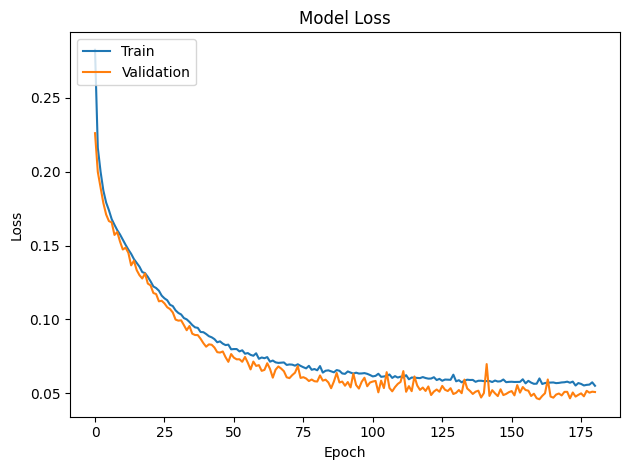

In [70]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [72]:
y_pred = model2.predict(X_test)
lstm_pred = [int(x) for x in (y_pred > 0.5)]

1788/1788 [==============================] - 7s 4ms/step


In [73]:
print(metrics.accuracy_score(lstm_pred, Y_test))

print(metrics.classification_report(Y_test, lstm_pred))

0.9480639804212918
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     36668
           1       0.89      0.98      0.93     20537

    accuracy                           0.95     57205
   macro avg       0.94      0.95      0.94     57205
weighted avg       0.95      0.95      0.95     57205

